# Natural Language Processing with NLTK

The process of getting a computer to understand natural language.

Challenges:
* Word sense disamguation: Disambiguating words using the context. e.g. He served the dish (context is food) vs He served the ball(context is sport)
* Pronoun resolution: Detecting the subjects and objects of verbs. e.g. The thieves stole the paintings. They were subsequently sold.
* Machine translation using text alignment based models.
* Textual entailment: Supporting a hypothesis.

In [1]:
# import libraries
import nltk

In [2]:
# download packages and resources
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Playing with NLTK functions

In [40]:
 # load a set of sample texts and sentences
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Find every occurence of a given word

In [46]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Finding words that are in a similar context to a specific word

In [47]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [48]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Examine the context that is shared by 2 or more words

In [50]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


A dispersion plot helps us in understanding occurence of a word in the given text.

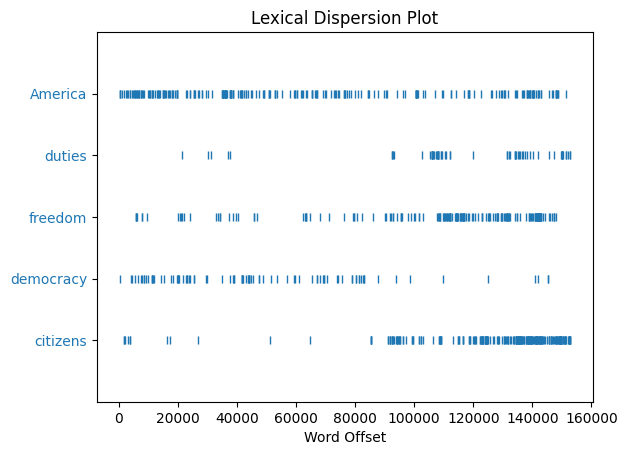

In [51]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Tokens are a sequence of characters and words after segmentation of the text

In [59]:
len(text2.tokens)

141576

The number of unique words and characters present in the text are called word types

In [57]:
# number of unique characters and words
len(set(text2))

6833

Lexical richness measure of the text can be computed by the number of distinct words present in the text

In [61]:
# percentage of unique words
(len(set(text2))/len(text2.tokens)) * 100

4.826383002768831

In [68]:
def lexical_diversity(text): 
    return 100 * len(set(text)) / len(text) 

In [69]:
# examine lexical richness of a text
lexical_diversity(text3)

6.2304530426235365

Counting how often a particular word occurs

In [65]:
text2.count('death')

13

Finding index of an occurrence

In [70]:
text4.index('awaken')

173

In [76]:
text4[173]

'awaken'

Finding the frequency distribution i.e. number of occurrences of words and characters in a text

In [79]:
freq_dist_txt = FreqDist(text1)
freq_dist_txt

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [82]:
# looking at the frequency of a word
freq_dist_txt['and']

6024

Cummulative distribution of frequency of words

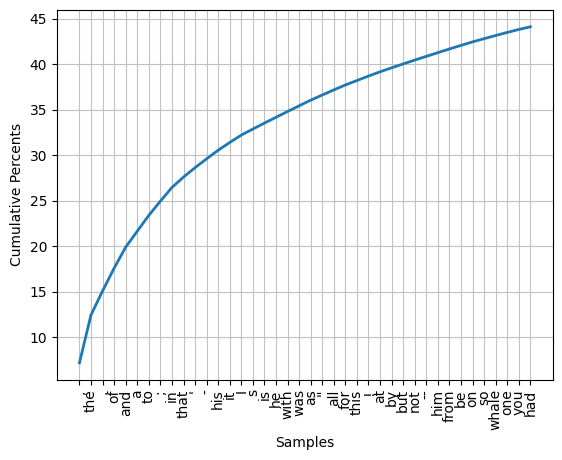

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Percents'>

In [93]:
freq_dist_txt.plot(40, cumulative=True, percents=True)

Find words that occur only once or hapaxes.

In [105]:
# list of words that occur only once
freq_dist_txt.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


Finding words that have length greater than a specific threshold. This helps us identify hapaxes that are not so frequent.

In [106]:
# get unique set of words
V = set(text1)
# list of words with len > x
long_words = [w for w in V if len(w) > 15]
long_words

['circumnavigation',
 'CIRCUMNAVIGATION',
 'physiognomically',
 'undiscriminating',
 'supernaturalness',
 'characteristically',
 'indispensableness',
 'indiscriminately',
 'responsibilities',
 'simultaneousness',
 'cannibalistically',
 'subterraneousness',
 'hermaphroditical',
 'superstitiousness',
 'circumnavigations',
 'apprehensiveness',
 'irresistibleness',
 'Physiognomically',
 'comprehensiveness',
 'uncomfortableness',
 'uninterpenetratingly',
 'preternaturalness',
 'uncompromisedness',
 'circumnavigating']

Finding words based on length and frequency

In [107]:
# get the frequency distribution
fdist5 = FreqDist(text5)
# subset words where len > x and freq > y
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Frequency distribution of the length of the words

In [112]:
FreqDist(len(w) for w in text1)

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

## Tokenizing

Grouping different words or sentences i.e. separating words and sentences

In [22]:
# import word and sentence tokenizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [23]:
# example sentence
sample_sent = 'Hello Mr.Deva, how are you? I hope this email finds you well.'

In [24]:
# creates a list with the sentence split into multiple sentences
sent_tokenize(sample_sent)

['Hello Mr.Deva, how are you?', 'I hope this email finds you well.']

In [25]:
# creates a list of words from the sentence
word_tokenize(sample_sent)

['Hello',
 'Mr.Deva',
 ',',
 'how',
 'are',
 'you',
 '?',
 'I',
 'hope',
 'this',
 'email',
 'finds',
 'you',
 'well',
 '.']

In [26]:
# python split based on space or any other character
sample_sent.split()

['Hello',
 'Mr.Deva,',
 'how',
 'are',
 'you?',
 'I',
 'hope',
 'this',
 'email',
 'finds',
 'you',
 'well.']

## Stop words

Drop words which do not carry any meaning.

In [27]:
from nltk.corpus import stopwords

In [28]:
# stopwords already present in nltk
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
# tokenize the sentence
words = word_tokenize(sentence1)
words

['Hello',
 'Mr.Deva',
 ',',
 'how',
 'are',
 'you',
 '?',
 'I',
 'hope',
 'this',
 'email',
 'finds',
 'you',
 'well',
 '.']

In [30]:
# filter the stop words
filtered_words = [w for w in words if w not in stop_words]
filtered_words

['Hello', 'Mr.Deva', ',', '?', 'I', 'hope', 'email', 'finds', 'well', '.']

## Stemming

Taking the root stem of a word. For example : 'I am riding a car' is the same as 'I was taking a ride in a car'. Here the word ride is going to be stemmed out.

In [31]:
from nltk.stem import PorterStemmer

In [32]:
# create a stemmer object
ps = PorterStemmer()

In [33]:
# create list of sample words
words1 = ['python','pythonic','pythonic']

In [34]:
# stem the list of words
for w in words1:
    print(ps.stem(w))

python
python
python


## Parts of Speech Tagging

Labelling the parts of speech to every word in a sentence.

In [35]:
from nltk.corpus import state_union
# a trained ml tokenizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk import pos_tag

In [36]:
# load sample text
sample_text = state_union.raw("2006-GWBush.txt")

In [37]:
# tokenize the text
custom_tokenizer = PunktSentenceTokenizer(sample_text)

In [38]:
# tokenize the sentences of the text
sent_tokens = custom_tokenizer.tokenize(sample_text)
sent_tokens

["PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all.",
 'Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.',
 'Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.',
 '(Applause.)',
 "President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan. 31, 2006. White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together.",
 'We have gathered under this Capitol dome in moments of national mourning and national achievement

In [39]:
# print the tags for all the words
for s in sent_tokens:
    words = word_tokenize(s)
    tags = pos_tag(words)
    print(tags)

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

[('For', 'IN'), ('all', 'DT'), ('Americans', 'NNPS'), ('--', ':'), ('for', 'IN'), ('all', 'DT'), ('Americans', 'NNPS'), (',', ','), ('we', 'PRP'), ('must', 'MD'), ('confront', 'VB'), ('the', 'DT'), ('rising', 'VBG'), ('cost', 'NN'), ('of', 'IN'), ('care', 'NN'), (',', ','), ('strengthen', 'VB'), ('the', 'DT'), ('doctor-patient', 'JJ'), ('relationship', 'NN'), (',', ','), ('and', 'CC'), ('help', 'NN'), ('people', 'NNS'), ('afford', 'VBP'), ('the', 'DT'), ('insurance', 'NN'), ('coverage', 'NN'), ('they', 'PRP'), ('need', 'VBP'), ('.', '.')]
[('(', '('), ('Applause', 'NNP'), ('.', '.'), (')', ')')]
[('We', 'PRP'), ('will', 'MD'), ('make', 'VB'), ('wider', 'JJR'), ('use', 'NN'), ('of', 'IN'), ('electronic', 'JJ'), ('records', 'NNS'), ('and', 'CC'), ('other', 'JJ'), ('health', 'NN'), ('information', 'NN'), ('technology', 'NN'), (',', ','), ('to', 'TO'), ('help', 'VB'), ('control', 'VB'), ('costs', 'NNS'), ('and', 'CC'), ('reduce', 'VB'), ('dangerous', 'JJ'), ('medical', 'JJ'), ('errors', 'N

## Chunking